In [13]:
%run matplotlib_setup.ipy
%run helper.ipy
from types import SimpleNamespace

from ipywidgets import interact
import matplotlib
from matplotlib import pyplot
from mpl_toolkits import mplot3d
import numpy as np
import scipy.linalg as la 
from Zak_compute import zak_bands

import kwant
from kwant.wraparound import wraparound, plot_2d_bands

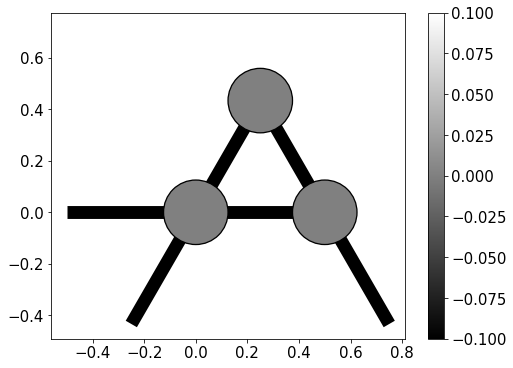

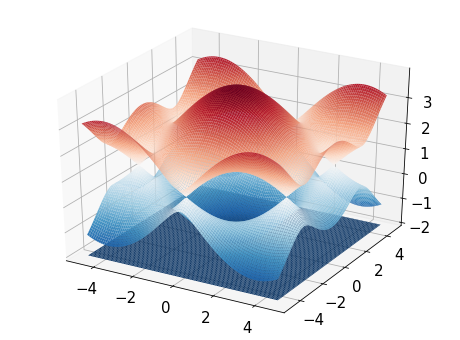

In [14]:
kag_lat = kwant.lattice.kagome()
kagome = kwant.Builder(kwant.TranslationalSymmetry(*kag_lat.prim_vecs))
kagome[kag_lat.shape((lambda pos: True), (0, 0))] = 0
kagome[kag_lat.neighbors(1)] = 1
kwant.plot(kagome,site_color=family_color,site_lw=0.01)
kagome = wraparound(kagome).finalized()
dispersion_2D(kag_lat,kagome)

In [15]:
n_basis = len(kagome.sites)
a1,a2 = kag_lat.prim_vecs
act_pos = np.array([kagome.pos(i) for i in range(n_basis)])
red_pos = np.matmul(act_pos,la.inv([a1,a2]))
h = kagome.hamiltonian_submatrix

In [16]:
import z2pack
from Z2_compute import zak_bands as zak_bands_z2

#ham_k=zak_bands_z2(kagome,momenta=1001,dim=2)
z2_system = z2pack.hm.System(h,dim=2,pos=red_pos,
                                 convention=2)

result = z2pack.surface.run(system=z2_system, 
                            surface=lambda t1,t2: [t1,t2],
                            pos_tol=1e-4,
                            iterator=range(200,500,2));

print("Z2invariant:",z2pack.invariant.z2(result))
print("Chern number:",z2pack.invariant.z2(result))


+----------------------------------------------------------------------+
|     ===================                                              |
|     SURFACE CALCULATION                                              |
|     ===================                                              |
|     starting at 2019-02-27 15:53:06,468                              |
|     running Z2Pack version 2.1.1                                     |
|                                                                      |
|     gap_tol:            0.3                                          |
|     init_result:        None                                         |
|     iterator:           range(200, 500, 2)                           |
|     load:               False                                        |
|     load_quiet:         True                                         |
|     min_neighbour_dist: 0.01                                         |
|     move_tol:           0.3                     

In [11]:
z2_system = z2pack.hm.System(h,dim=2,pos=red_pos,bands=3,
                                 convention=2)

result_line = z2pack.line.run(system=z2_system, 
                        line=lambda t1: [t1,0],
                        pos_tol=1e-4,
                        iterator=range(200,500,2));

print("WCC: \n",result_line.wcc)
print("Polarization: \n",result_line.pol)


+----------------------------------------------------------------------+
|        ================                                              |
|        LINE CALCULATION                                              |
|        ================                                              |
|        starting at 2019-02-27 11:38:01,271                           |
|        running Z2Pack version 2.1.1                                  |
|                                                                      |
|        init_result: None                                             |
|        iterator:    range(200, 500, 2)                               |
|        line:        <function <lambda> at 0x10d57cc80>               |
|        load:        False                                            |
|        load_quiet:  True                                             |
|        pos_tol:     0.0001                                           |
|        save_file:   None                        